In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

In [62]:
df = pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
def missing_values_table(df):
    #total missing values
    miss_val = df.isna().sum()
    
    #percentage of missing values
    miss_val_percentage = 100 * df.isna().sum()/len(df)
    
    #make the table for the results
    miss_val_table = pd.concat([miss_val, miss_val_percentage], axis = 1)

    #renaming the table columns
    missing_values_table = miss_val_table.rename(columns = {0:"Missing values", 1:"%Missing"})

    #sort values in the table
    sorted_data = missing_values_table.sort_values(by = 'Missing values', ascending = False)
    
    #print some summary information
    print("Your selected dataframe has " + str(df.shape) + "Columns" + str(df.columns))
    
    return sorted_data

In [5]:
missing = missing_values_table(df)
missing

Your selected dataframe has (344, 7)ColumnsIndex(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


,Missing values,%Missing
sex,10,2.906977
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
species,0,0.000000
island,0,0.000000


In [6]:
sorted_data = missing.sort_values(by = 'Missing values', ascending =  False)
sorted_data

,Missing values,%Missing
sex,10,2.906977
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
species,0,0.000000
island,0,0.000000


In [7]:
df[df['culmen_length_mm'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
#number of species in dataset
df['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object>

sns.barplot(df.species.value_count.s)

<Axes: title={'center': 'species of penguins'}, xlabel='species'>

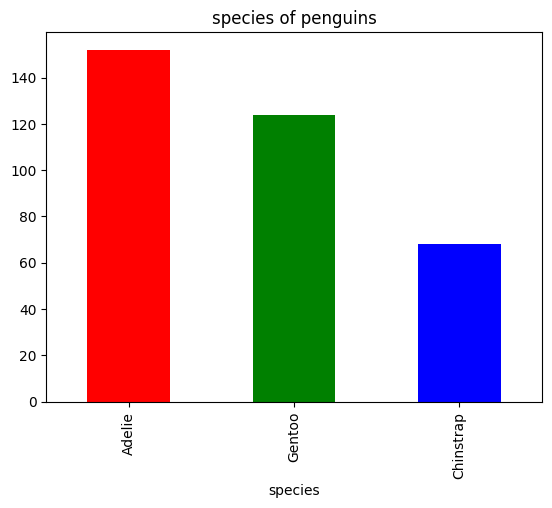

In [10]:
df.species.value_counts().plot(kind = 'bar', color = ['r', 'g', 'b'], title = 'species of penguins')

In [11]:
df.island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<Axes: title={'center': 'Island'}, xlabel='island'>

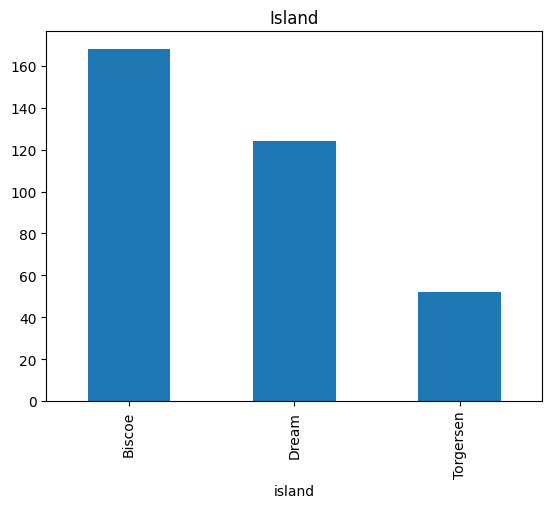

In [12]:
df.island.value_counts().plot(kind = 'bar', title = 'Island')

In [13]:
df.sex.value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

<Axes: title={'center': 'segrigation based on sex'}, ylabel='count'>

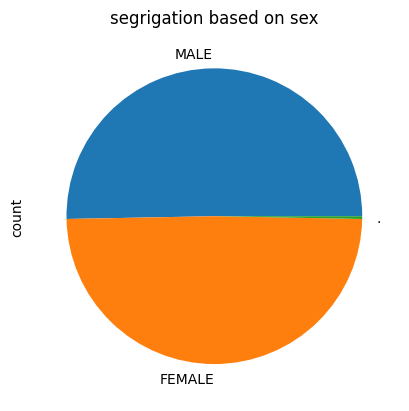

In [14]:
df.sex.value_counts().plot(kind = 'pie', title = 'segrigation based on sex')

C:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


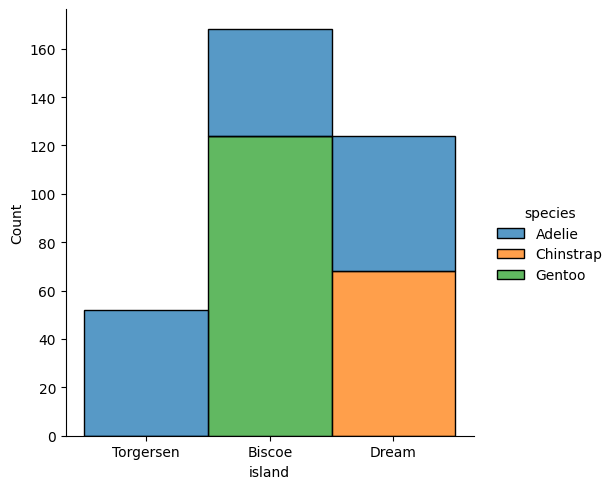

In [15]:
sns.displot(df, x = 'island', hue = 'species', multiple = 'stack')

<Axes: >

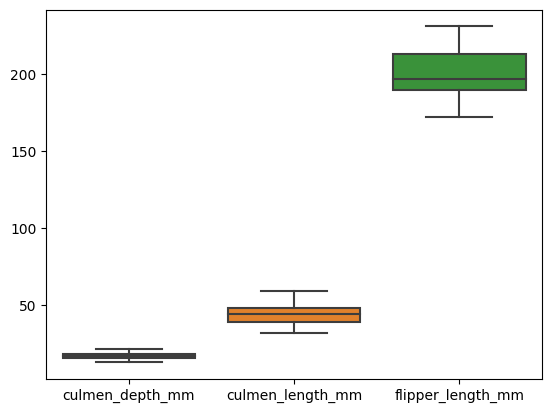

In [16]:
df1 = df[["culmen_depth_mm", "culmen_length_mm", "flipper_length_mm"]]
sns.boxplot(data=df1)

In [17]:
imputer = SimpleImputer(strategy='mean')
df2=imputer.fit_transform(df1)
df2

array([[ 18.7,  39.1, 181. ],
       [ 17.4,  39.5, 186. ],
       [ 18. ,  40.3, 195. ],
       ...,
       [ 15.7,  50.4, 222. ],
       [ 14.8,  45.2, 212. ],
       [ 16.1,  49.9, 213. ]])

In [18]:
lb = LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])
df['sex']

0      2
1      1
2      1
3      3
4      1
      ..
339    3
340    1
341    2
342    1
343    2
Name: sex, Length: 344, dtype: int32

C:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


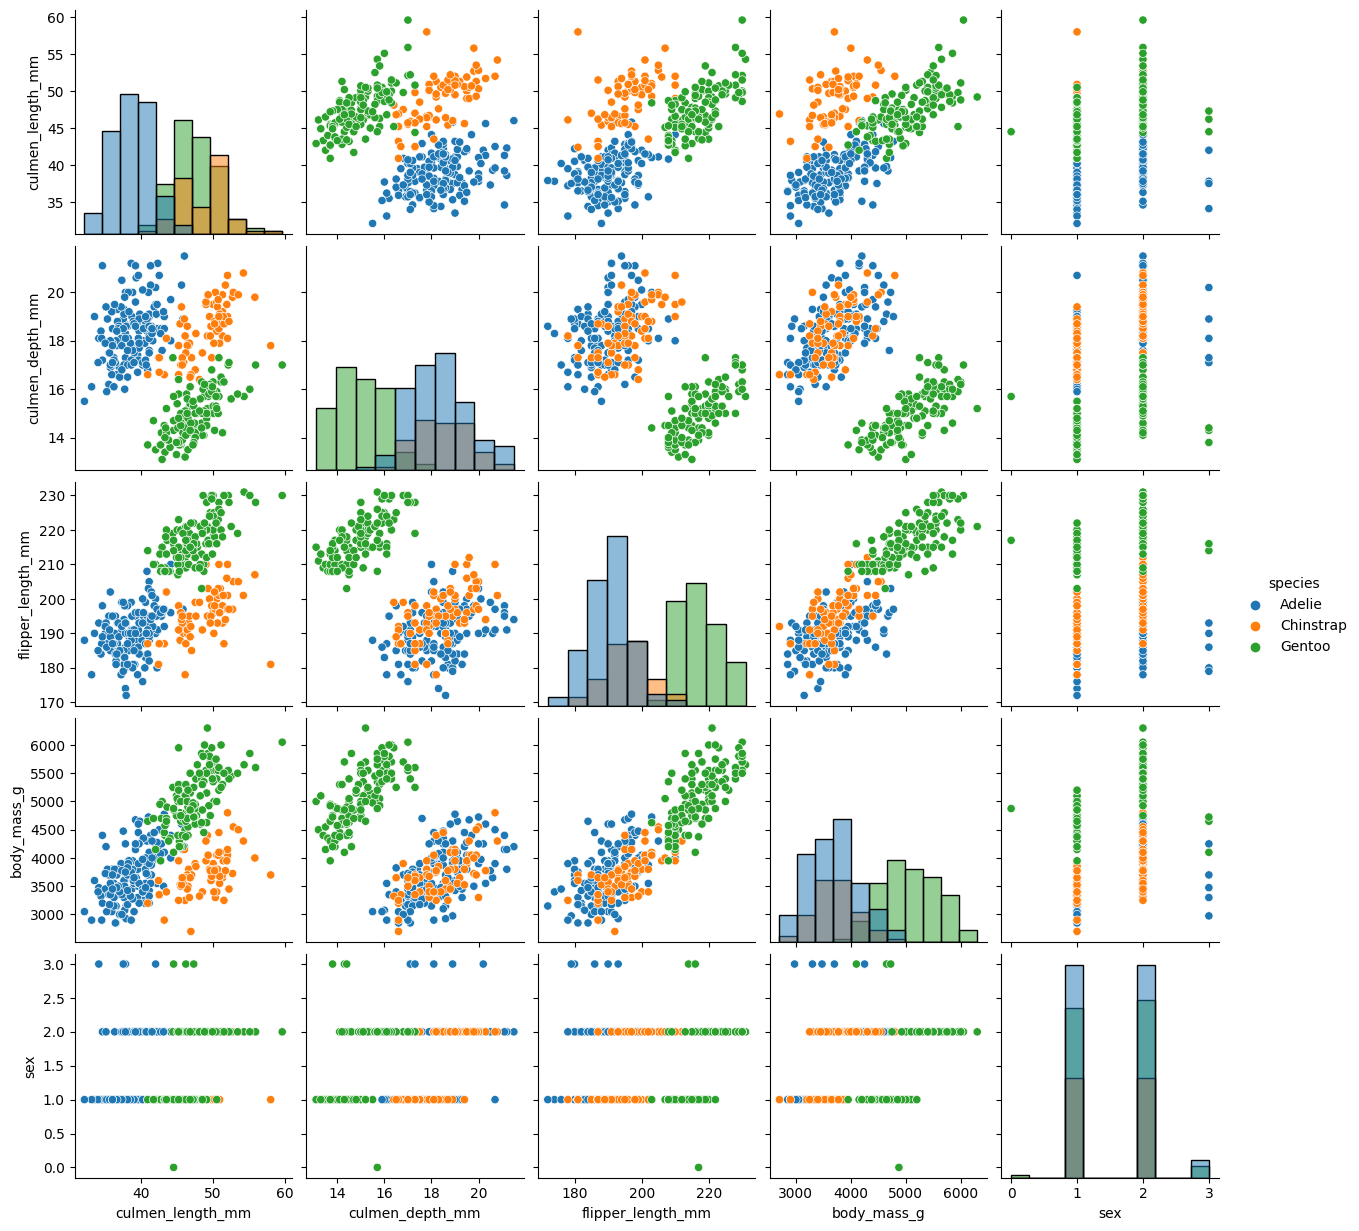

In [19]:
sns.pairplot(data=df, hue='species', diag_kind="hist")

In [24]:
penguin_data = df[["culmen_length_mm", 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
scaled_penguin_data

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [38]:
list2 = [[11,2],[3,7]]
scaler = MinMaxScaler()
model = scaler.fit(list2)
scaled_data = model.transform(list2)
scaled_data

array([[1., 0.],
       [0., 1.]])

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

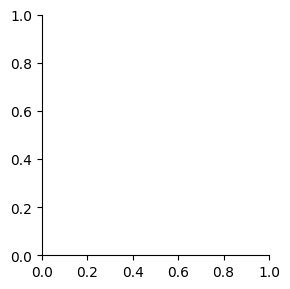

In [40]:
graph = sns.FacetGrid(df, hue ='species')
graph.map(plt

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

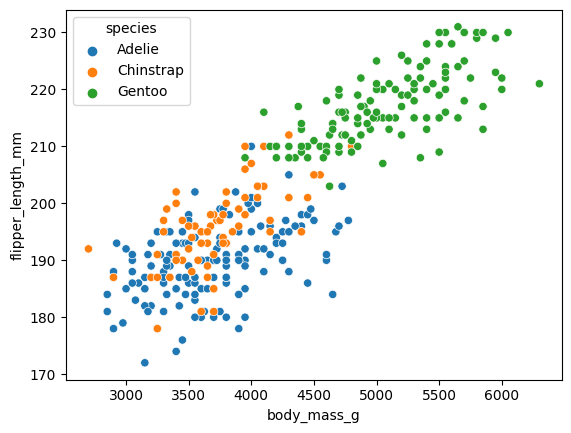

In [51]:
sns.scatterplot(data=df,x="body_mass_g",y='flipper_length_mm',hue='species')

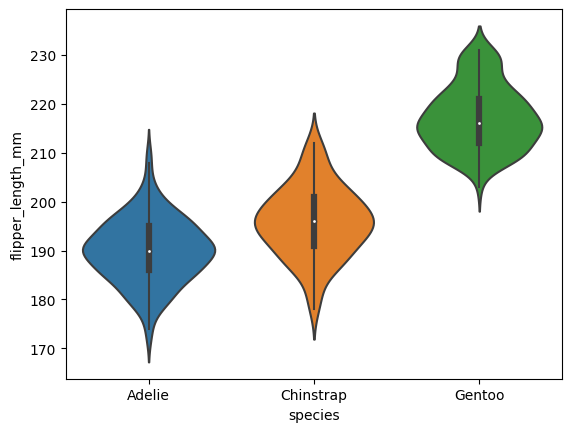

In [63]:
ax = sns.violinplot(x="species",y="flipper_length_mm",data=df)

C:\Users\Gargi\AppData\Local\Temp\ipykernel_4368\763528846.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plot = sns.kdeplot(data=df,x="flipper_length_mm",shade=True,hue="species")


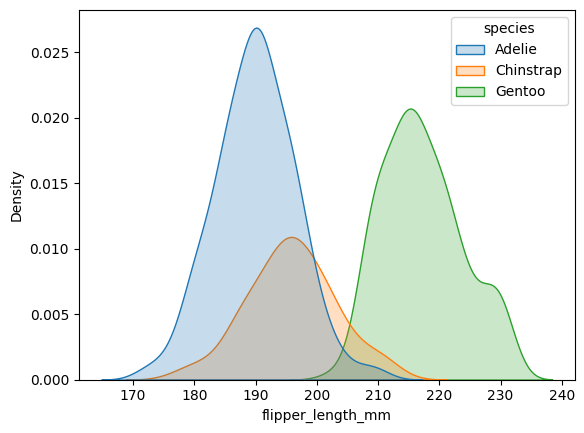

In [60]:
plot = sns.kdeplot(data=df,x="flipper_length_mm",shade=True,hue="species")